In [1]:
import matplotlib.pyplot as plt

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용 시, 마이너스 기호 깨짐 방지

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,790 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and dire

## 구글드라이브 마운트

In [12]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## 필요 라이브러리 임포트
- 추가 사용자 정의함수 불러오기

In [13]:
# 라이브러리 임포트
import os
import numpy as np
import pandas as pd
import chardet

import time

import folium

# 사용자 정의함수 경로 설정
import sys
# sys.path.append("H:/내 드라이브/_Projects/재정데이터분석_미니프로젝트/Source/_Custom_Function")
sys.path.append("/gdrive/MyDrive/_Projects/재정데이터분석_미니프로젝트/Source/_Custom_Function")

# 사용자 정의함수 불러오기
import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

import dataset_function as ds_f
import folium_function as fl_f
import plot_function as pl_f

### 데이터셋 기본 경로 설정

In [14]:
# 나의 루트 경로 설정
path_dateset = '/gdrive/MyDrive/_Projects/재정데이터분석_미니프로젝트/DataSet/'

### 파일 이름 설정

In [15]:
file_name_1 = '전처리/가해운전자_차량용도별_교차로형태별_교통사고_2020_2023.csv'
file_name_2 = '전처리/가해운전자_차량용도별_도로종류별_교통사고_2020_2023.csv'
file_name_3 = '전처리/가해운전자_차량용도별_도로형태별_교통사고_2020_2023.csv'
file_name_4 = '전처리/가해운전자_차량용도별_연령층별_교통사고_2020_2023.csv'

### 데이터의 행 개수만큼만 읽기
- 대용량 파일의 경우, 파일의 형식을 먼저 확인하기 위해서 사용

In [16]:
er.Read_nrows(path_dateset + file_name_2, 3)

,연도,구분,일반국도,지방도,특별광역시도,시도,군도,고속국도,기타
0,2020,사고[건],30,23,528,222,10,NaN,84
1,2020,사망[명],1,1,4,4,0,NaN,0
2,2020,부상[명],33,27,572,245,11,NaN,97


### 파일읽기

In [17]:
df_temp = em.Read_File(path_dateset + file_name_2)

read_file - file_path :  /gdrive/MyDrive/_Projects/재정데이터분석_미니프로젝트/DataSet/전처리/가해운전자_차량용도별_도로종류별_교통사고_2020_2023.csv , encoding :  UTF-8-SIG


In [18]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      12 non-null     int64  
 1   구분      12 non-null     object 
 2   일반국도    12 non-null     int64  
 3   지방도     12 non-null     int64  
 4   특별광역시도  12 non-null     int64  
 5   시도      12 non-null     int64  
 6   군도      12 non-null     int64  
 7   고속국도    0 non-null      float64
 8   기타      12 non-null     int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 992.0+ bytes


In [19]:
df_temp.columns

Index(['연도', '구분', '일반국도', '지방도', '특별광역시도', '시도', '군도', '고속국도', '기타'], dtype='object')

In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [21]:
df_temp

,연도,구분,일반국도,지방도,특별광역시도,시도,군도,고속국도,기타
0,2020,사고[건],30,23,528,222,10,NaN,84
1,2020,사망[명],1,1,4,4,0,NaN,0
2,2020,부상[명],33,27,572,245,11,NaN,97
3,2021,사고[건],88,73,754,552,23,NaN,245
4,2021,사망[명],1,0,5,8,1,NaN,4
5,2021,부상[명],94,80,841,599,25,NaN,262
6,2022,사고[건],187,113,805,880,31,NaN,370
7,2022,사망[명],3,1,9,11,0,NaN,2
8,2022,부상[명],212,121,910,985,37,NaN,419
9,2023,사고[건],199,99,946,835,27,NaN,283


<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 4

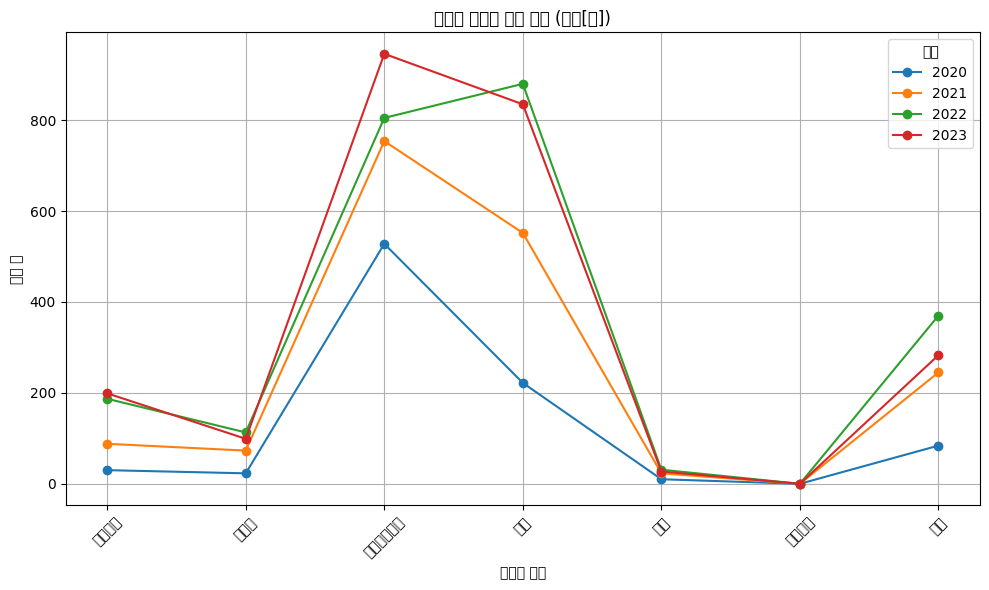

<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 4

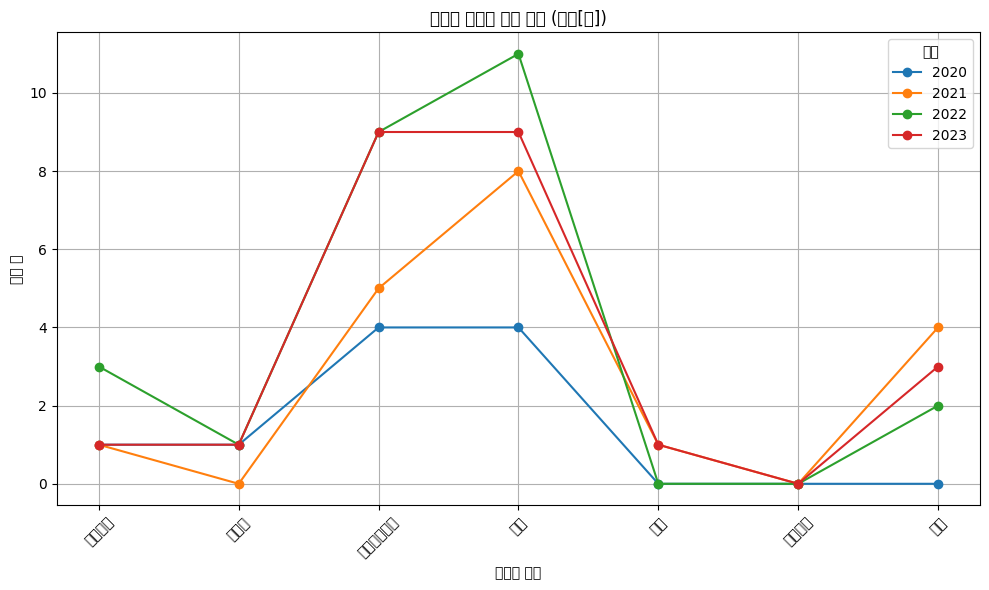

<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  plt.tight_layout()
<ipython-input-27-33a4f8b9a6de>:28: UserWarning: Glyph 4

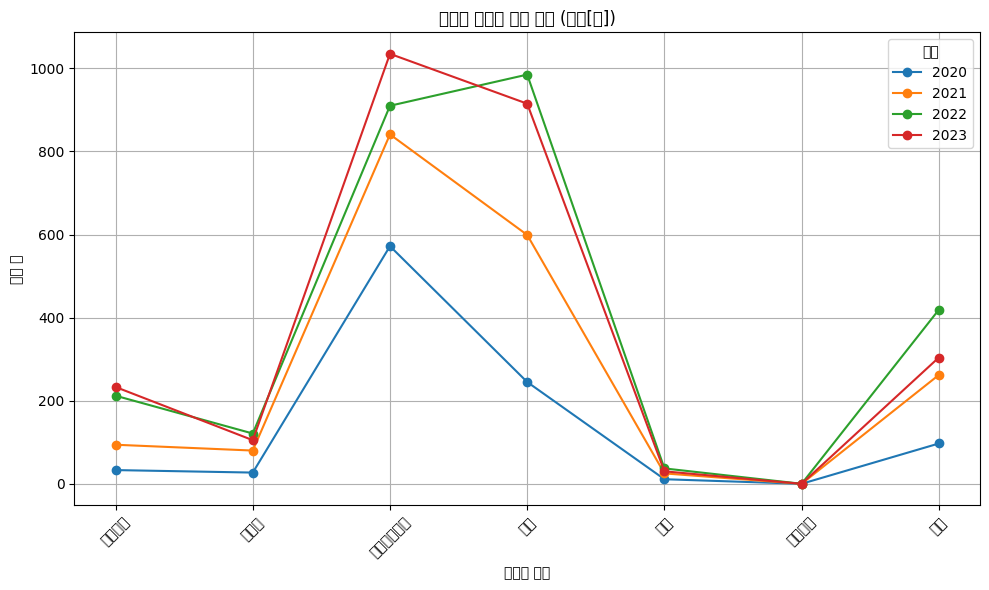

In [27]:
import matplotlib.pyplot as plt

# 나눔고딕 폰트 설정
plt.rc('font', family='NanumGothic')
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

gb = ['사고[건]', '사망[명]', '부상[명]']

for g in gb:
  df = df_temp[df_temp['구분'] == g][['연도', '일반국도', '지방도', '특별광역시도', '시도', '군도', '고속국도', '기타']]
  df_melted  = df.melt(id_vars=['연도'], var_name='교차로유형', value_name='사고수')
  df_melted['사고수'] = df_melted['사고수'].fillna(0)
  df_melted['사고수'] = df_melted['사고수'].astype(int)

  # 라인 플롯
  plt.figure(figsize=(10, 6))
  for year in df_melted['연도'].unique():
      subset = df_melted[df_melted['연도'] == year]
      plt.plot(subset['교차로유형'], subset['사고수'], marker='o', label=str(year))

  plt.title('교차로 형태별 사고 현황 (' + g + ')')
  plt.xlabel('교차로 형태')
  plt.ylabel('사고 수')
  plt.legend(title='연도')
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [34]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# 데이터 준비 (df_temp가 이미 존재한다고 가정)
gb = ['사고[건]', '사망[명]', '부상[명]']

# 색상 팔레트 생성
# color_palette = px.colors.sequential.Aggrnyl
# color_palette = px.colors.sequential.Blues[::-1]
color_palette = px.colors.cyclical.HSV[::-1]

# 서브플롯 생성
fig = make_subplots(rows=len(gb), cols=1, subplot_titles=[f'도로종류별 사고 현황 ({g})' for g in gb])

for i, g in enumerate(gb, start=1):
    df = df_temp[df_temp['구분'] == g][['연도', '일반국도', '지방도', '특별광역시도', '시도', '군도', '고속국도', '기타']]
    df_melted = df.melt(id_vars=['연도'], var_name='도로종류별', value_name='사고수')
    df_melted['사고수'] = df_melted['사고수'].fillna(0)
    df_melted['사고수'] = df_melted['사고수'].astype(int)

    for j, year in enumerate(df_melted['연도'].unique()):
        subset = df_melted[df_melted['연도'] == year]
        color = color_palette[j % len(color_palette)]  # 색상 순환
        fig.add_trace(
            go.Scatter(
                x=subset['도로종류별'],
                y=subset['사고수'],
                mode='lines+markers',
                name=str(year),
                line=dict(color=color),
                marker=dict(color=color),
                showlegend=(i==1)
            ),
            row=i, col=1
        )

    fig.update_xaxes(title_text='도로종류', row=i, col=1)
    fig.update_yaxes(title_text='사고 수', row=i, col=1)

# 전체 레이아웃 업데이트
fig.update_layout(
    height=300*len(gb),
    title_text='도로종류별 사고 현황',
    legend_title_text='연도',
    font=dict(family='NanumGothic'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# X축과 Y축 눈금 글씨 크기 조정
fig.update_xaxes(
    tickfont=dict(size=12, family='Arial', color='gray'),
    tickmode='array',
    tickvals=df_melted['도로종류별'].unique(),
    ticktext=df_melted['도로종류별'].unique(),
    tickangle=45
)
fig.update_yaxes(tickfont=dict(size=12, family='Arial', color='gray'))

# 그래프 표시
fig.show()

In [35]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# 데이터 준비 (df_temp가 이미 존재한다고 가정)
gb = ['사고[건]', '사망[명]', '부상[명]']

# 색상 팔레트 생성
# color_palette = px.colors.sequential.Aggrnyl
color_palette = px.colors.cyclical.HSV[::-1]

# 서브플롯 생성
fig = make_subplots(rows=len(gb), cols=1, subplot_titles=[f'도로종류별 사고 현황 ({g})' for g in gb])

for i, g in enumerate(gb, start=1):
    df = df_temp[df_temp['구분'] == g][['연도', '일반국도', '지방도', '특별광역시도', '시도', '군도', '고속국도', '기타']]
    df_melted = df.melt(id_vars=['연도'], var_name='도로종류별', value_name='사고수')
    df_melted['사고수'] = df_melted['사고수'].fillna(0)
    df_melted['사고수'] = df_melted['사고수'].astype(int)

    for j, year in enumerate(sorted(df_melted['연도'].unique(), reverse=True)):
        subset = df_melted[df_melted['연도'] == year]
        color = color_palette[j % len(color_palette)]  # 색상 순환
        fig.add_trace(
            go.Bar(
                x=subset['도로종류별'],
                y=subset['사고수'],
                name=str(year),
                marker_color=color,
                showlegend=(i==1)
            ),
            row=i, col=1
        )

    fig.update_xaxes(title_text='도로종류', row=i, col=1)
    fig.update_yaxes(title_text='사고 수', row=i, col=1)

# 전체 레이아웃 업데이트
fig.update_layout(
    height=300*len(gb),
    title_text='도로종류별 사고 현황',
    legend_title_text='연도',
    font=dict(family='NanumGothic'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    barmode='stack'
)

# X축과 Y축 눈금 글씨 크기 조정
fig.update_xaxes(tickfont=dict(size=12, family='Arial', color='gray'))
fig.update_yaxes(tickfont=dict(size=12, family='Arial', color='gray'))

# 그래프 표시
fig.show()